<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_1_2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-1.2'

In [4]:
os.listdir(base_path)

['data_add_delta_-1.2_n30.csv',
 'data_add_delta_-1.2_n20.csv',
 'data_add_delta_-1.2_n60.csv',
 'data_add_delta_-1.2_n120.csv',
 'data_add_delta_-1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,87.956370,78.930703,31.152249,-0.106430,207.932893,208.062511,-0.129618
1,0.0,1.0,80.001441,98.766730,72.305803,0.010358,261.084331,261.105602,-0.021270
2,0.0,2.0,64.860630,64.855318,70.951138,0.018432,210.685518,210.687661,-0.002143
3,0.0,3.0,72.909100,21.998300,60.194117,0.032131,165.133649,165.124070,0.009578
4,0.0,4.0,82.546554,54.242286,97.295809,-0.093298,243.991350,244.126571,-0.135221
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,78.505239,65.753232,35.078317,0.132116,189.468904,189.355676,0.113227
59996,999.0,56.0,43.422709,25.876782,24.342926,0.153698,103.796115,103.618639,0.177476
59997,999.0,57.0,82.283646,69.275560,93.210944,0.198745,254.968895,254.765764,0.203131
59998,999.0,58.0,72.336167,27.720093,49.729734,0.058065,159.844060,159.749106,0.094953


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,87.956370,78.930703,31.152249,-0.106430,207.932893,208.062511,-0.129618
1,0.0,1.0,80.001441,98.766730,72.305803,0.010358,261.084331,261.105602,-0.021270
2,0.0,2.0,64.860630,64.855318,70.951138,0.018432,210.685518,210.687661,-0.002143
3,0.0,3.0,72.909100,21.998300,60.194117,0.032131,165.133649,165.124070,0.009578
4,0.0,4.0,82.546554,54.242286,97.295809,-0.093298,243.991350,244.126571,-0.135221
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,78.505239,65.753232,35.078317,0.132116,189.468904,189.355676,0.113227
59996,999.0,56.0,43.422709,25.876782,24.342926,0.153698,103.796115,103.618639,0.177476
59997,999.0,57.0,82.283646,69.275560,93.210944,0.198745,254.968895,254.765764,0.203131
59998,999.0,58.0,72.336167,27.720093,49.729734,0.058065,159.844060,159.749106,0.094953


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    87.956370  78.930703  31.152249  ...  207.932893  208.062511 -0.129618
      1.0    80.001441  98.766730  72.305803  ...  261.084331  261.105602 -0.021270
      2.0    64.860630  64.855318  70.951138  ...  210.685518  210.687661 -0.002143
      3.0    72.909100  21.998300  60.194117  ...  165.133649  165.124070  0.009578
      4.0    82.546554  54.242286  97.295809  ...  243.991350  244.126571 -0.135221
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   78.505239  65.753232  35.078317  ...  189.468904  189.355676  0.113227
      56.0   43.422709  25.876782  24.342926  ...  103.796115  103.618639  0.177476
      57.0   82.283646  69.275560  93.210944  ...  254.968895  254.765764  0.203131
      58.0   72.336167  27.720093  49.729734  ...  159.844060  159.749106  0.094953
      59.0   50.451950  61.027202  89.536793  ...  211.030748  211.006432  0.024316

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    87.956370  78.930703  31.152249  ...  207.932893  208.062511 -0.129618
      1.0    80.001441  98.766730  72.305803  ...  261.084331  261.105602 -0.021270
      2.0    64.860630  64.855318  70.951138  ...  210.685518  210.687661 -0.002143
      3.0    72.909100  21.998300  60.194117  ...  165.133649  165.124070  0.009578
      4.0    82.546554  54.242286  97.295809  ...  243.991350  244.126571 -0.135221
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   78.505239  65.753232  35.078317  ...  189.468904  189.355676  0.113227
      56.0   43.422709  25.876782  24.342926  ...  103.796115  103.618639  0.177476
      57.0   82.283646  69.275560  93.210944  ...  254.968895  254.765764  0.203131
      58.0   72.336167  27.720093  49.729734  ...  159.844060  159.749106  0.094953
      59.0   50.451950  61.027202  89.536793  ...  211.030748  211.006432  0.024316

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,87.956370,78.930703,31.152249,-0.106430,207.932893,208.062511,-0.129618
1,0.0,1.0,80.001441,98.766730,72.305803,0.010358,261.084331,261.105602,-0.021270
2,0.0,2.0,64.860630,64.855318,70.951138,0.018432,210.685518,210.687661,-0.002143
3,0.0,3.0,72.909100,21.998300,60.194117,0.032131,165.133649,165.124070,0.009578
4,0.0,4.0,82.546554,54.242286,97.295809,-0.093298,243.991350,244.126571,-0.135221
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,78.505239,65.753232,35.078317,0.132116,189.468904,189.355676,0.113227
59996,999.0,56.0,43.422709,25.876782,24.342926,0.153698,103.796115,103.618639,0.177476
59997,999.0,57.0,82.283646,69.275560,93.210944,0.198745,254.968895,254.765764,0.203131
59998,999.0,58.0,72.336167,27.720093,49.729734,0.058065,159.844060,159.749106,0.094953


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    87.956370  78.930703  31.152249  ...  207.932893  208.062511 -0.129618
      1.0    80.001441  98.766730  72.305803  ...  261.084331  261.105602 -0.021270
      2.0    64.860630  64.855318  70.951138  ...  210.685518  210.687661 -0.002143
      3.0    72.909100  21.998300  60.194117  ...  165.133649  165.124070  0.009578
      4.0    82.546554  54.242286  97.295809  ...  243.991350  244.126571 -0.135221
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   78.505239  65.753232  35.078317  ...  189.468904  189.355676  0.113227
      56.0   43.422709  25.876782  24.342926  ...  103.796115  103.618639  0.177476
      57.0   82.283646  69.275560  93.210944  ...  254.968895  254.765764  0.203131
      58.0   72.336167  27.720093  49.729734  ...  159.844060  159.749106  0.094953
      59.0   50.451950  61.027202  89.536793  ...  211.030748  211.006432  0.024316

[60000 rows x 7 columns]

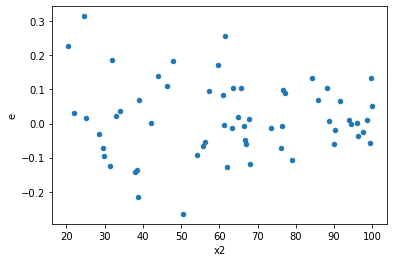

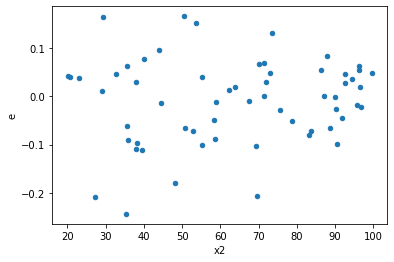

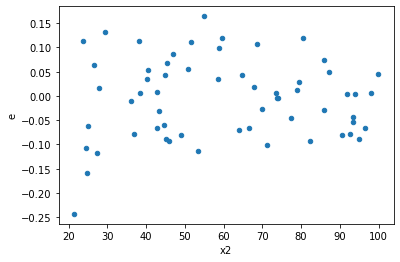

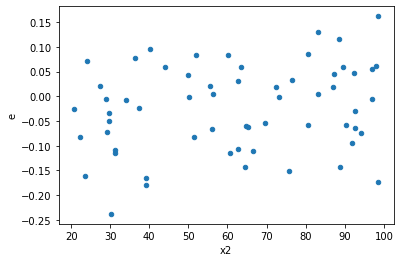

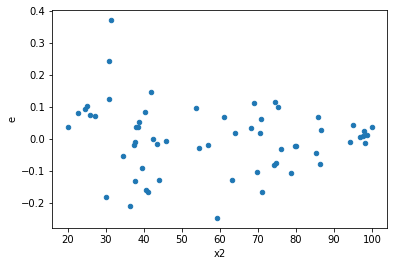

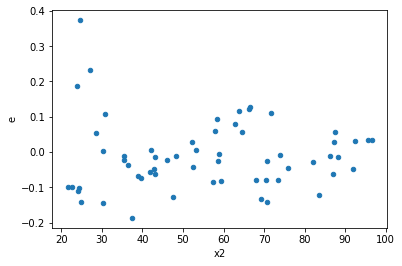

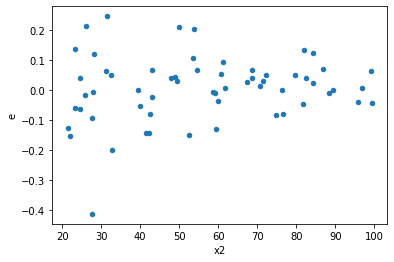

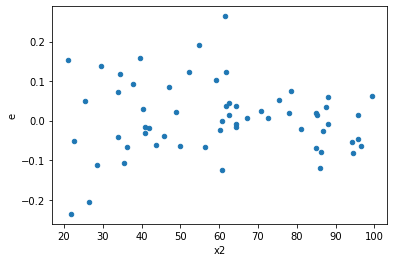

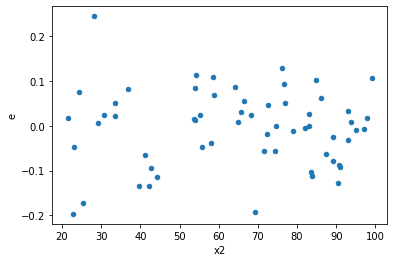

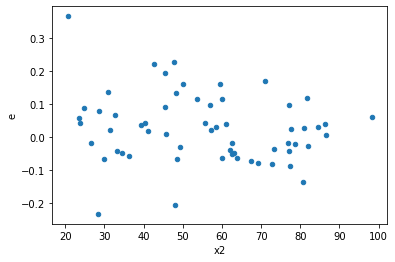

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,21.0,21.0,0.15939217577539042,0.17436512538217225,0.007590103608351924,0.00830310120867487,1.093937795465451,0.8389370582069149,0.5805314708965426,0.41946852910345744,Reject001=1 : Homoscedasticity
71.0,21.0,21.0,0.1468839329347633,0.16378531637298793,0.00699447299689349,0.0077993007796660924,1.1150662506138855,0.8052637751619547,0.5973681124190227,0.40263188758097734,Reject001=1 : Homoscedasticity
74.0,21.0,21.0,0.10026552147282904,0.1904468700145149,0.004774548641563288,0.009068898572119757,1.8994253180653342,0.1497084442578398,0.9251457778710801,0.0748542221289199,Reject001=1 : Homoscedasticity
106.0,21.0,21.0,0.12718591198678472,0.18539210076719875,0.006056471999370701,0.008828195274628511,1.457646510302666,0.3949233221610551,0.8025383389194725,0.19746166108052754,Reject001=1 : Homoscedasticity
181.0,21.0,21.0,0.11752225429749892,0.17794407635649345,0.005596297823690425,0.008473527445547307,1.5141308973366112,0.34928228923928617,0.8253588553803569,0.17464114461964309,Reject001=1 : Homoscedasticity
249.0,21.0,21.0,0.10192296860520118,0.1168154901683683,0.0048534746954857705,0.005562642388969919,1.1461154611857247,0.7575745158771099,0.6212127420614451,0.37878725793855494,Reject001=1 : Homoscedasticity
445.0,21.0,21.0,0.14610274277615237,0.14956451606234336,0.006957273465531065,0.007122119812492541,1.0236941019751755,0.9577148019784802,0.5211425990107599,0.4788574009892401,Reject001=1 : Homoscedasticity
449.0,21.0,21.0,0.1358436800081937,0.1658024360845768,0.006468746667056842,0.007895354099265561,1.220538460637816,0.6520863231347098,0.6739568384326451,0.3260431615673549,Reject001=1 : Homoscedasticity
471.0,21.0,21.0,0.12310553560874599,0.16128908742100903,0.005862168362321237,0.007680432734333763,1.3101692513131011,0.5413530266210169,0.7293234866894915,0.27067651331050846,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,0.4221351933524976,0.10555565638144641,0.020101675873928457,0.005026459827687925,0.25005177972286186,0.0024772552375529767,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,0.23157280727895552,0.07555662923043074,0.011027276537093119,0.0035979347252586068,0.3262759134729247,0.013335101089786862,Reject001=1 : Homoscedasticity
2.0,21.0,21.0,0.17922512036675253,0.0814286303348983,0.008534529541273931,0.0038775538254713477,0.45433714965998623,0.07770893039038786,Reject001=1 : Homoscedasticity
3.0,21.0,21.0,0.15939217577539042,0.17436512538217225,0.007590103608351924,0.00830310120867487,1.093937795465451,0.8389370582069149,Reject001=1 : Homoscedasticity
4.0,21.0,21.0,0.3634581917924005,0.08784467671853283,0.017307532942495263,0.004183079843739658,0.24169128307529744,0.00196684243818107,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,0.343427384648305,0.13198100392486775,0.01635368498325262,0.006284809710707988,0.38430541600526713,0.03346209358507638,Reject001=1 : Homoscedasticity
6.0,21.0,21.0,0.4364653440332916,0.06428804270433738,0.020784064001585317,0.0030613353668732086,0.14729243359911245,4.8380815423537165e-05,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,0.2263015170402167,0.05495944570566192,0.010776262716200795,0.002617116462174377,0.24285937816269662,0.002032658287884765,Reject001=0 : Heteroscedasticity
8.0,21.0,21.0,0.21079672599194063,0.10130123120080764,0.010037939332949554,0.0048238681524194115,0.4805635890411347,0.100718390120983,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      610
Reject001=0 : Heteroscedasticity    390
Name: Result_test, dtype: int64